# SVM: Radial Kernel

This notebooks contains an excerpt of the chapter In-Depth: Support Vector Machines from the book the Python Data Science Handbook by Jake VanderPlas. An amazing book wich explains the theorical concepts behind SVM as well as provide the coding scripts

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_circles
from ipywidgets import interact, fixed
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def plot_radial(factor, noise):
    X,Y = make_circles(100, factor=0.1, noise=0.1)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer')
    

In [3]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [4]:
interact(plot_radial, factor=[0.1, 0.3, 0.5, 0.7, 1], noise=[0.1, 0.3, 0.5, 0.7, 1])

interactive(children=(Dropdown(description='factor', options=(0.1, 0.3, 0.5, 0.7, 1), value=0.1), Dropdown(des…

<function __main__.plot_radial(factor, noise)>

In [5]:
from mpl_toolkits import mplot3d

In [6]:
r=np.exp(-(X**2).sum(1))

In [7]:
def plot_3D (elev=30, azim=30, X=X, Y=Y, r=r):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1],r,c=Y, s=50, cmap='summer')
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    ax.set_xlabel('r')

In [8]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90, -60, -30, 0, 30, 60, 90], azim=[-90, -60, -30, 0, 30, 60, 90], X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.73905673,  0.69622479],
       [-0.05873646, -1.03051915],
       [ 0.77192631, -0.68554187],
       [-1.19681806,  0.30223741],
       [ 0.05288613, -0.08980853],
       [ 0.18813618, -0.08471111],
       [ 0.05725304, -0.19283366],
       [-0.00650941, -0.11892477],
       [ 0.02130932,  0.23972247],
       [-0.12078109, -0.01331146],
       [ 0.03772034,  0.12864735],
       [-1.14050605,  0.56525765],
       [ 0.28317293, -0.79385488],
       [-0.83669979, -0.68799519],
       [ 0.76497251,  0.81309784],
       [ 0.11732007,  0.89097598],
       [-0.10574572,  0.01072751],
       [-0.08190692, -0.23418381],
       [ 0.06530924, -0.09440916],
       [ 0.51436775,  0.78314554],
       [ 0.1269875 , -0.04780128],
       [ 0.42922557,  0.81561192],
       [ 0.04374585, -0.12607984],
       [ 1.03501318,  0.05484314],
       [ 0.03044052, -0.12870067],
       [ 0.84455652,  0.3015603 ],
       [ 0.16255002, -0.13635853],
       [

In [9]:
rbf=SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
def plt_svc (model, ax=None, plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    xx=np.linspace(xlim[0], xlim[1],30)
    yy=np.linspace(ylim[0], ylim[1],30)
    Y,X=np.meshgrid(yy,xx)
    
    
    xy =np.vstack([X.ravel(), Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    
    ax.contour(X,Y,P, colors='k', levels=[-1,0,1], linestyles=['--', '-' , '--'])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=60, linewidth=1,)
                   

[[ 0.28317293 -0.79385488]
 [ 0.42922557  0.81561192]
 [ 0.84455652  0.3015603 ]
 [-0.18223037 -0.83833983]
 [-0.18285605  0.81360685]
 [-0.55381101  0.650512  ]
 [ 0.89798317 -0.09980357]
 [-0.77445919 -0.16192056]
 [-0.08190692 -0.23418381]
 [-0.25490912 -0.01530551]
 [ 0.26625434  0.00942827]]


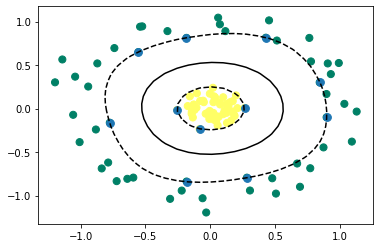

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='summer')
plt_svc(rbf)